# Zestaw 2, listy i proste algorytmy

### Zadanie 1
Napisać algorytm, który sprawdza czy dwa odcinki na płaszczyźnie się przecinają. Odcinki są dane przez współrzędne ich końców, np.: [(0,1),(3,4)].

<h2>Zadanie 2</h2>
<p>Napisać funkcję generującą <a href="http://pl.wikipedia.org/wiki/Macierz_Hilberta" target="_blank">macierz Hilberta</a>, dowolnego stopnia.</p>
<p>Macierze mogą być inicjalizowane funkcją <span style="font-family: 'courier new', courier;">matrix</span>, która przyjmuje elementy w postaci listy wierszy. Np.:</p>

In [1]:
wiersze  = [[1,2], [2,2], [22,33] ]
show(matrix(wiersze))

[ 1  2]
[ 2  2]
[22 33]

<h3>Zadanie 3</h3>
<p>Jednym ze sposobów tworzenia listy jest dodawanie do niej elementów metodą <span style="font-family: 'courier new', courier;">append</span>, np.:</p>

In [2]:
l = []
l.append( 12 )
l.append( "d")
print l

[12, 'd']


<p>Wykorzystując ta metodę utworzyć listę liczb naturalnych, od 5 do 10 włacznie.</p>

<h2>Zadanie 4</h2>
<p>Wygenerować listę liczb:</p>
<ul>
<li>od -5 do 10, z krokiem 0.12</li>
<li>25-ciu liczb na odcinku (-5,10) z wartościami brzegowymi włącznie, równooddalonych od siebie.</li>
</ul>
<p> </p>

<h3>Zadanie 5</h3>
<p>Elemtentami listy może być wszystko. Z drugiej strony wykres, jest objektem:</p>
<p> </p>

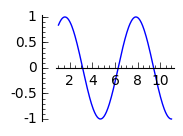

In [3]:
p = plot(sin(x),(x,1,11),figsize=2)
p.show()
p.save("1.pdf")

In [4]:
p2 = plot(cos(x),(x,1,11),color='red')

<p>Wykresy można dodawać:</p>

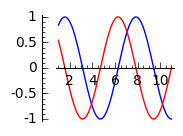

In [5]:
p3 = p + p2
p3.show()

<p>Utworzyć listę dziesięciu wykresów o rozmiarze 3cm, które przedstawiają funkcję $f(x) = \sin(x-a)$, dla $a\in(0,\pi)$</p>
<p>Wypróbować funkcję animate(lista_wykresow).</p>
<p> </p>

<h2>Zadanie 6</h2>
<p>Sprawdzić, czy szereg $$ \sum_{n=0}^\infty \frac{x^n}{n!}$$ zbiega się do $e^x$, obliczając jego sumę dla dużych $n$. </p>

<h3>Przykład 1</h3>
<p>Emach</p>

In [6]:
1.0 == 1.0+1e-16

True

In [8]:
%%python 
x = 1.0
for i in range(120):
    if 1.0 == 1.0+x:
        print i,x
        break
    x = x/2

53 1.11022302463e-16


<p>Dowolna precyzja w Sage</p>

In [9]:
R = RealField(67)
x = R(1.0)
print "Mantysa x jest = ",x.prec()," bitowa"
for i in range(120):
    if R(1.0) == R(1.0)+x:
        print i,x
        break
    x = x/2
    
(1/2*R(1.23)).prec()

Mantysa x jest =  67  bitowa
67 6.776263578034402713e-21


67

<h2>Dodatek.</h2>
<p>Poprawa funkcja generująca ciąg liczb wg. reguły Collatza. </p>

In [10]:
def Collatz2(x=120):
    """
funkcja obliczajaca ciagi liczb wystepujacych w hipotezie Collatza
    """
    for i in range(1000):
        if x%2 == 0:
            x=(x/2)
        else:
            if x%2 != 0:
                x=(3*(x)+1)
        
        if x==1:
            return i+1
        
    return 1000
    
timeit('Collatz2(2120)')

625 loops, best of 3: 346 µs per loop


In [11]:
%%cython 

def Collatz(long x=120):
    cdef long long i
    for i in range(1000000):
        if x%2 == 0:
            x=(x/2)
        else:
            if x%2 != 0:
                x=(3*(x)+1)
        
        if x==1:
            return i+1
        
    return 666

In [12]:
timeit('Collatz(2120)')

625 loops, best of 3: 669 ns per loop


In [13]:
%time 
c = [ (i,Collatz(i)) for i in range(10000000,11000000)]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


In [19]:
c[:11],len(c)

([(10000000, 145),
  (10000001, 114),
  (10000002, 137),
  (10000003, 137),
  (10000004, 163),
  (10000005, 163),
  (10000006, 163),
  (10000007, 132),
  (10000008, 176),
  (10000009, 220),
  (10000010, 176)],
 1000000)

CPU times: user 356 ms, sys: 16 ms, total: 372 ms
Wall time: 393 ms


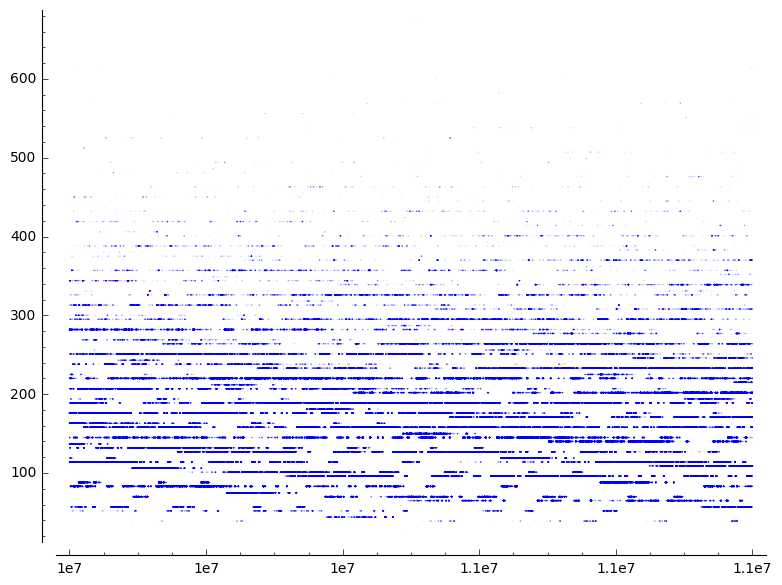

In [20]:
%%time
%point2d(c,alpha=0.1,size=1)

In [25]:
%%time
max_i = 0
bigN = 10**18
for i in range(bigN,bigN+10000):
    max_i = max([Collatz(i),max_i])
    
print max_i

903
CPU times: user 3.4 s, sys: 8 ms, total: 3.41 s
Wall time: 3.39 s
